<a href="https://colab.research.google.com/github/gabrielcarcedo/Programa-Intensivo-en-Ciencia-de-Datos-De-los-Fundamentos-al-Deep-Learning/blob/main/Notebooks/PICD_Perceptr%C3%B3n_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Programa Intensivo en Ciencia de Datos de los Fundamentos al Deep Learning** 💻

---

## **Módulo 3**: *Redes Neuronales Artificiales* 🧠🤖

---

<table>
  <tr>
    <td width="80%" valign="top">
      <!-- Content for Column 1 -->
      <h4>Dra. Nidiyare Hevia Montiel: <a href= "mailto:nidiyare.hevia@iimas.unam.mx">nidiyare.hevia@iimas.unam.mx</a>
      <br>
      <br>
      Dra. Blanca Vázquez Gómez: <a href= "mailto:blanca.vazquez@iimas.unam.mx">blanca.vazquez@iimas.unam.mx</a>
      <br>
      <br>
      Ing. Gabriel Carcedo Rodríguez: <a href= "mailto:gabrielcarcedo@comunidad.unam.mx">gabrielcarcedo@comunidad.unam.mx</a> </h4>
    </td>
    <td width="20%" valign="top">
      <!-- Content for Column 2 -->
      <a href="https://arbioiimas.github.io/ArBio"><img src="https://arbioiimas.github.io/ArBio/images/logo_arbio.png" alt="Artificial Intelligence in Biomedicine Group (ArBio)" style="width:80%; height:auto;"></a>
    </td>
  </tr>
  <tr>
    <td width="80%" valign="top">
      <!-- Content for Column 1 -->
      <h4>Programa impartido por el <a href="https://www.iimas.unam.mx/">Instituto de Investigaciones en Matemáticas Aplicadas y en Sistemas, IIMAS, UNAM</a>.
      <br>
      <br>
      Para mayor información visite el <a href="https://www.iimas.unam.mx/educacioncontinua/curso_deep_learning.html">sitio oficial</a>.
    </td>
    <td width="20%" valign="top">
      <!-- Content for Column 2 -->
      <a href="https://www.iimas.unam.mx/educacioncontinua/"><img src="https://www.iimas.unam.mx/educacioncontinua/images/logo.svg" alt="Educación Continua, IIMAS, UNAM" style="width:100%; height:auto;"></a></h4>
    </td>
  </tr>
</table>

---
---

# Paquetes y Librerías 📚

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Funciones de activación 📈

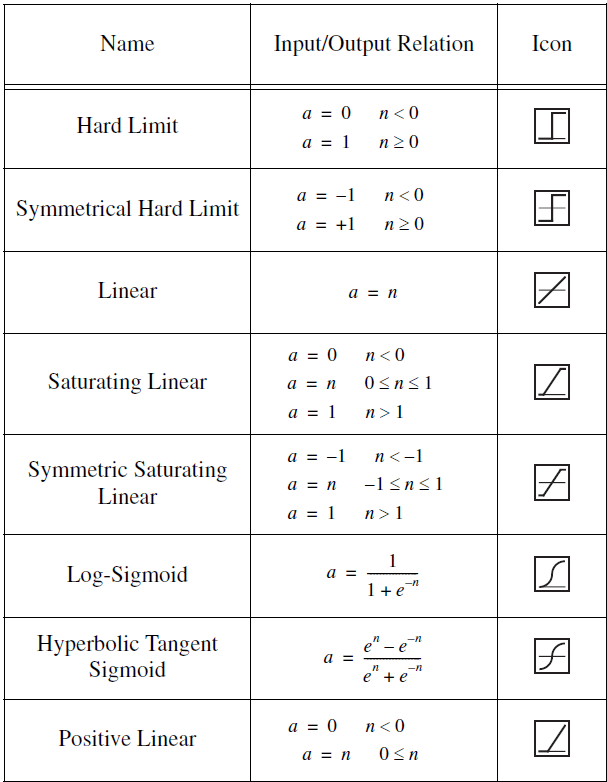

*Recuperado de*: **Hagan M, Demuth H, Beale M, De Jesús O** (2014). *Neural Network Design 2nd Ed*.

In [2]:
def step(n):
    return np.where(n >= 0, 1, 0)

def stepSym(n):
    return np.where(n < 0, -1, 1)

def linear(n):
    return np.array(n)

def linearSat(n):
    return np.clip(n, 0, 1)

def linearSatSym(n):
    return np.clip(n, -1, 1)

def sigmoid(n):
    return 1 / (1 + np.exp(-n))

def tanh(n):
    return np.tanh(n)

def relu(n):
    return np.maximum(0, n)

def leakyRelu(n):
    return np.where(n < 0, 0.01 * n, n)

def elu(n):
    return np.where(n < 0, 0.01 * (np.exp(n) - 1), n)

def softmax(n):
    return np.exp(n) / np.sum(np.exp(n))

def softPlus(n):
    return np.log(1 + np.exp(n))

def logSigmoid(n):
    return np.log(1 / (1 + np.exp(-n)))

def hyperbTanhSigmoid(n):
    return np.tanh(logSigmoid(n))


### Probar salidas

In [3]:
n = np.array([[0.5, -1.2, 3.0],
              [-0.7, 0.0, 2.1]])

for func in [step, stepSym, linear, linearSat, linearSatSym, sigmoid, tanh, relu, leakyRelu, elu, softPlus, logSigmoid, hyperbTanhSigmoid, softmax]:
    print(f"{func.__name__}:\n{func(n)}\n")


step:
[[1 0 1]
 [0 1 1]]

stepSym:
[[ 1 -1  1]
 [-1  1  1]]

linear:
[[ 0.5 -1.2  3. ]
 [-0.7  0.   2.1]]

linearSat:
[[0.5 0.  1. ]
 [0.  0.  1. ]]

linearSatSym:
[[ 0.5 -1.   1. ]
 [-0.7  0.   1. ]]

sigmoid:
[[0.62245933 0.23147522 0.95257413]
 [0.33181223 0.5        0.89090318]]

tanh:
[[ 0.46211716 -0.83365461  0.99505475]
 [-0.60436778  0.          0.97045194]]

relu:
[[0.5 0.  3. ]
 [0.  0.  2.1]]

leakyRelu:
[[ 0.5   -0.012  3.   ]
 [-0.007  0.     2.1  ]]

elu:
[[ 0.5        -0.00698806  3.        ]
 [-0.00503415  0.          2.1       ]]

softPlus:
[[0.97407698 0.26328247 3.04858735]
 [0.40318605 0.69314718 2.21551952]]

logSigmoid:
[[-0.47407698 -1.46328247 -0.04858735]
 [-1.10318605 -0.69314718 -0.11551952]]

hyperbTanhSigmoid:
[[-0.44148755 -0.89828824 -0.04854915]
 [-0.80164054 -0.6        -0.11500839]]

softmax:
[[0.05201308 0.00950193 0.63364898]
 [0.01566604 0.03154753 0.25762245]]



### Visualizar las funciones

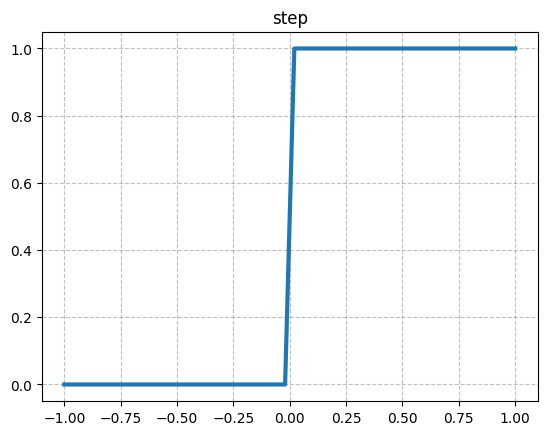

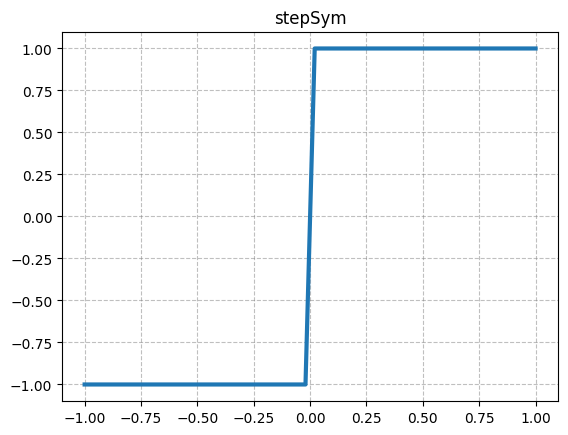

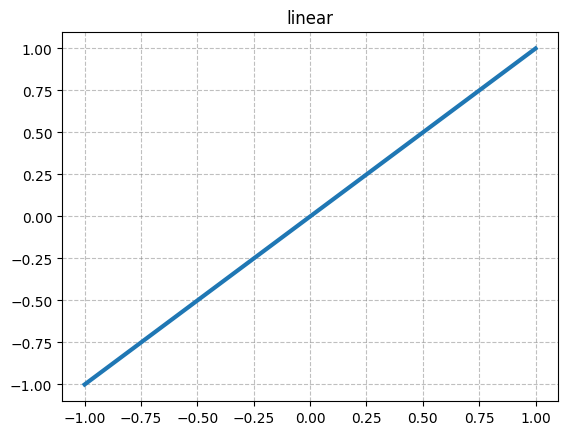

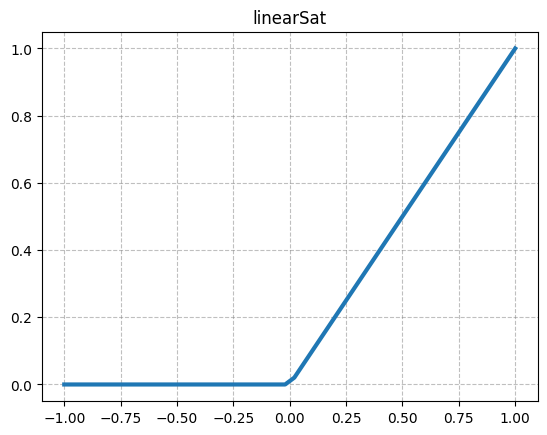

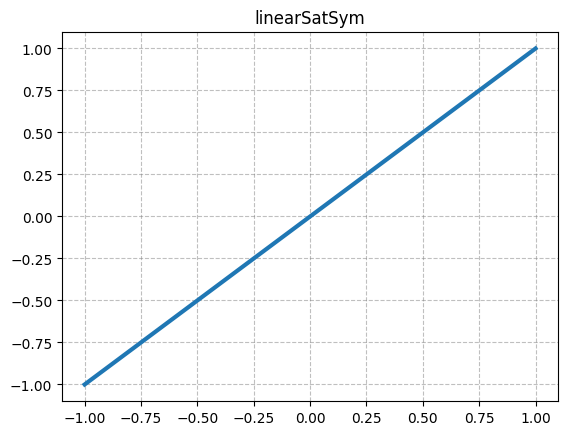

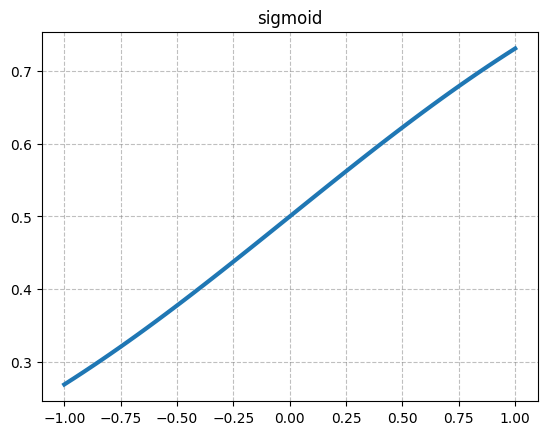

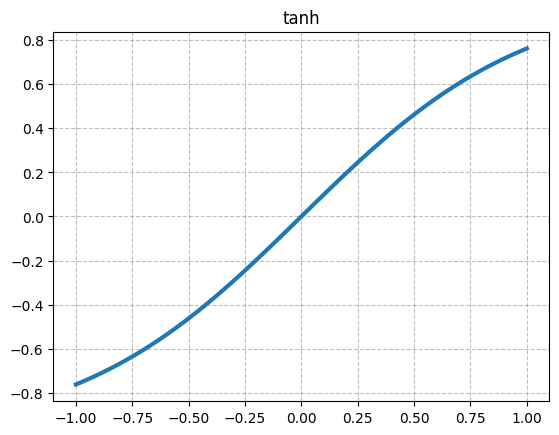

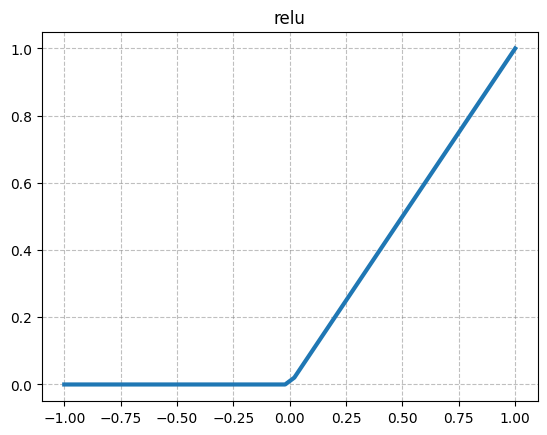

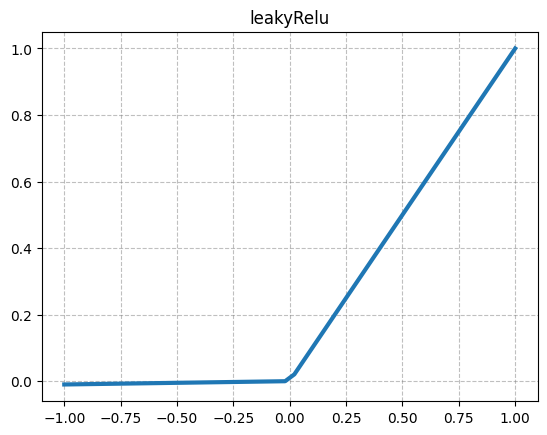

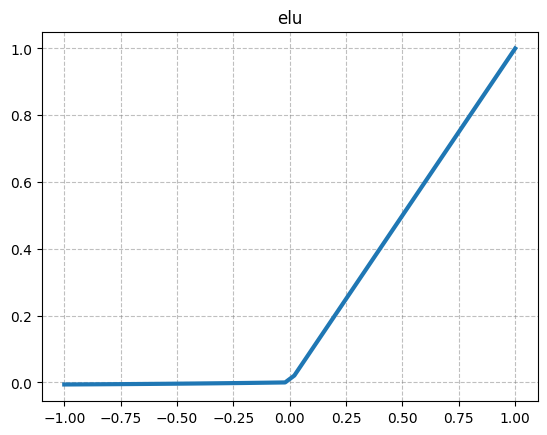

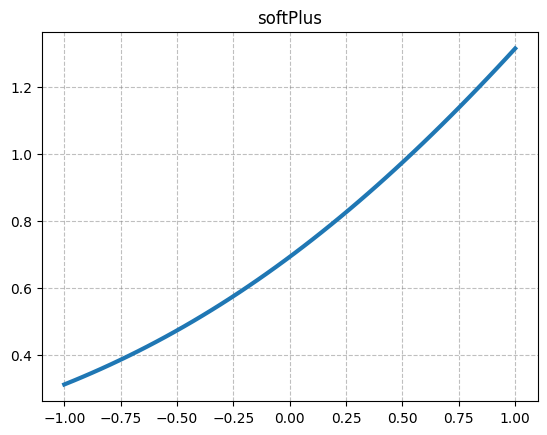

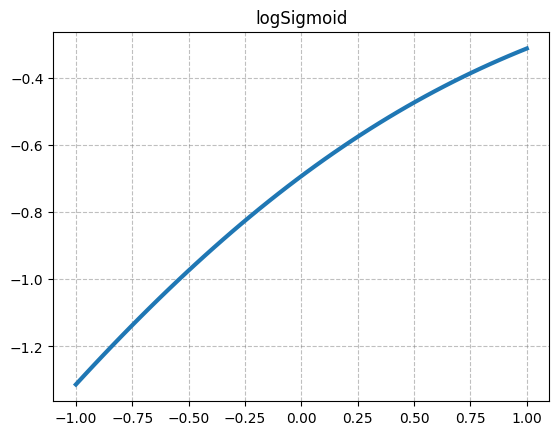

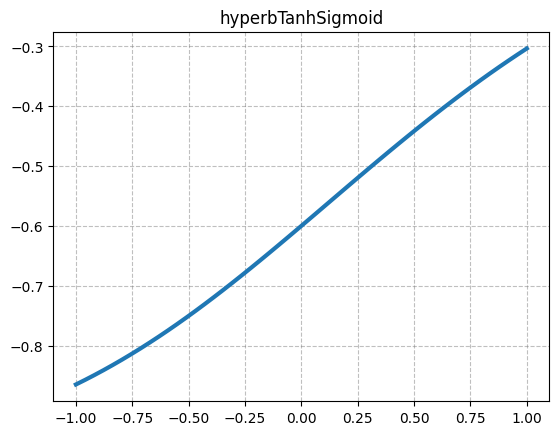

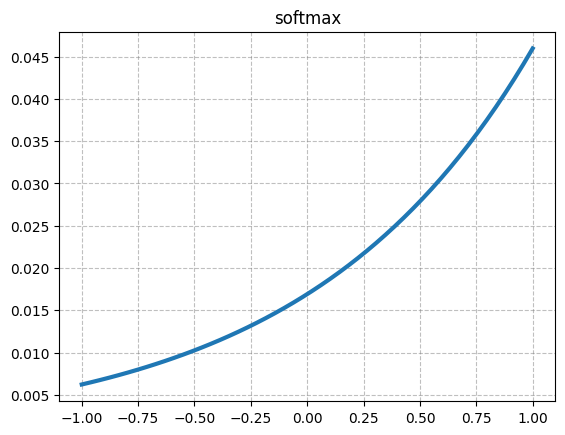

In [4]:
funciones_activacion = {
    'step': step,
    'stepSym': stepSym,
    'linear': linear,
    'linearSat': linearSat,
    'linearSatSym': linearSatSym,
    'sigmoid': sigmoid,
    'tanh': tanh,
    'relu': relu,
    'leakyRelu': leakyRelu,
    'elu': elu,
    'softPlus': softPlus,
    'logSigmoid': logSigmoid,
    'hyperbTanhSigmoid': hyperbTanhSigmoid,
    'softmax': softmax
}

x = np.linspace(-1,1)

for k,v in funciones_activacion.items():
    plt.plot(x, v(x), lw=3)
    plt.title(k)
    plt.grid(ls='--', c='gray', alpha=0.5)
    plt.show()

---
# **Perceptrón Simple**
## 1 entrada, 1 salida
---

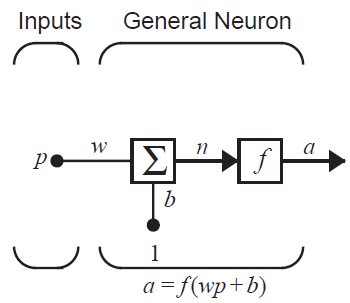


*Recuperado de*: **Hagan M, Demuth H, Beale M, De Jesús O** (2014). *Neural Network Design 2nd Ed*.

# Generar el dataset

In [5]:
# Número de registros
samples = 20

np.random.seed(1)  # semilla para reproducibilidad

# Generar promedios aleatorios
promedios = np.random.uniform(5, 10, samples)   # promedios de 5 a 10

# Etiquetas
aceptado = (promedios > 7.5).astype(int)   # regla: si promedio > 7.5 → aceptado=1

for idx in range(samples):
  print(f"Promedio: {promedios[idx]:.2f} → Aceptado: {aceptado[idx]}")

Promedio: 7.09 → Aceptado: 0
Promedio: 8.60 → Aceptado: 1
Promedio: 5.00 → Aceptado: 0
Promedio: 6.51 → Aceptado: 0
Promedio: 5.73 → Aceptado: 0
Promedio: 5.46 → Aceptado: 0
Promedio: 5.93 → Aceptado: 0
Promedio: 6.73 → Aceptado: 0
Promedio: 6.98 → Aceptado: 0
Promedio: 7.69 → Aceptado: 1
Promedio: 7.10 → Aceptado: 0
Promedio: 8.43 → Aceptado: 1
Promedio: 6.02 → Aceptado: 0
Promedio: 9.39 → Aceptado: 1
Promedio: 5.14 → Aceptado: 0
Promedio: 8.35 → Aceptado: 1
Promedio: 7.09 → Aceptado: 0
Promedio: 7.79 → Aceptado: 1
Promedio: 5.70 → Aceptado: 0
Promedio: 5.99 → Aceptado: 0


# Visualizar el Dataset

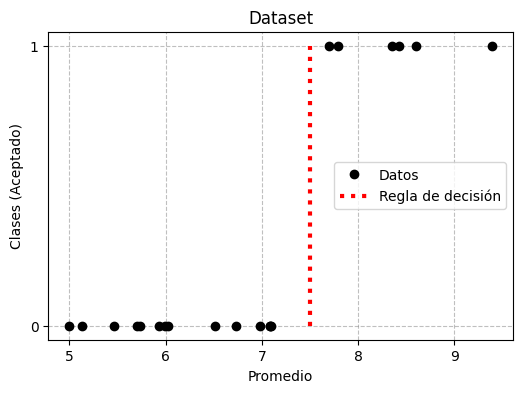

In [6]:
plt.figure(figsize=(6, 4))
plt.plot(promedios, aceptado, 'o', color='black', label='Datos')
plt.title('Dataset')
plt.xlabel('Promedio')
plt.ylabel('Clases (Aceptado)')
plt.vlines(7.5, 0, 1, color='r', ls=':', lw=3, label='Regla de decisión')
plt.legend(loc = 'center right')
plt.grid(ls='--', color='grey', alpha=0.5)
plt.yticks([0, 1])
plt.show()

# Inicialización de parámetros

In [7]:
# Dataset: Usamos promedio -> aceptado
p = promedios.reshape(-1,1) # tamaño de entrada (n,1)
a = aceptado # tamaño de salida (n,)


# Inicializar aleatoriamente los pesos y bias (sesgos)
np.random.seed(10) # Pueden cambiarlo a su consideración
w = np.random.rand()  # peso escalar porque es una sola entrada
b = np.random.rand()
epochs = 10

print("Peso inicial:", w)
print("Bias inicial:", b)

Peso inicial: 0.771320643266746
Bias inicial: 0.0207519493594015


### Función Sumatoria

In [8]:
def SumMult(p, w, b):
    """
    Calcula n = p*w + b
    p : vector de entradas (n,1)
    w : peso escalar
    b : bias escalar
    """
    n = p * w + b
    return n

# Entrenamiento

In [9]:
losses, accs, weights, biases = [], [], [], []

for epoch in range(epochs):
    for i in range(len(p)):
        pi = p[i]
        ai = a[i]

        # Paso hacia adelante
        n = SumMult(pi, w, b)
        a_hat = step(n) # salida predicha

        # Cálculo del error
        error = ai - a_hat

        # Actualización de pesos
        w += error * pi
        b += error

    # Métricas por época
    n_all = SumMult(p, w, b)
    predictions = step(n_all)
    acc = np.mean(predictions.flatten() == a)
    loss = np.mean((predictions.flatten() - a) ** 2)

    losses.append(loss)
    accs.append(acc)
    weights.append(w.item())
    biases.append(b.item())

    print(f"Epoch {epoch+1}/{epochs} - Acc: {acc:.2f} - Loss: {loss:.2f} - w: {w.item():.2f} - b: {b.item():.2f}")

Epoch 1/10 - Acc: 0.70 - Loss: 0.30 - w: -1.49 - b: -1.98
Epoch 2/10 - Acc: 0.70 - Loss: 0.30 - w: -2.14 - b: -3.98
Epoch 3/10 - Acc: 0.70 - Loss: 0.30 - w: -2.79 - b: -5.98
Epoch 4/10 - Acc: 1.00 - Loss: 0.00 - w: 0.81 - b: -5.98
Epoch 5/10 - Acc: 1.00 - Loss: 0.00 - w: 0.81 - b: -5.98
Epoch 6/10 - Acc: 1.00 - Loss: 0.00 - w: 0.81 - b: -5.98
Epoch 7/10 - Acc: 1.00 - Loss: 0.00 - w: 0.81 - b: -5.98
Epoch 8/10 - Acc: 1.00 - Loss: 0.00 - w: 0.81 - b: -5.98
Epoch 9/10 - Acc: 1.00 - Loss: 0.00 - w: 0.81 - b: -5.98
Epoch 10/10 - Acc: 1.00 - Loss: 0.00 - w: 0.81 - b: -5.98


# Visualizar convergencias

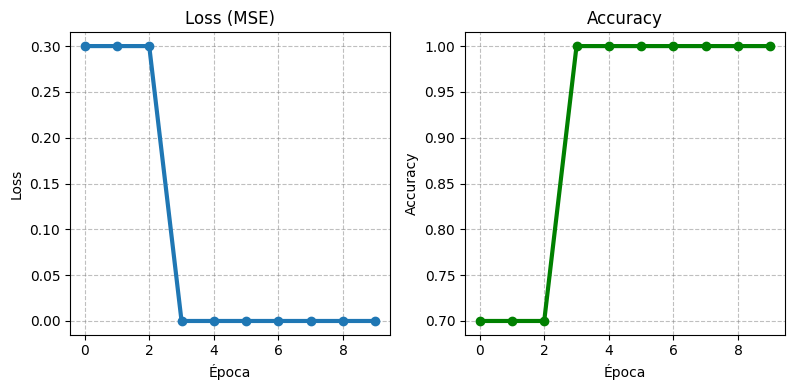

In [10]:
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.plot(losses, marker="o", lw=3)
plt.title("Loss (MSE)")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(ls='--', color='grey', alpha=0.5)

plt.subplot(1,3,2)
plt.plot(accs, marker="o", color="g", lw=3)
plt.title("Accuracy")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.grid(ls='--', color='grey', alpha=0.5)

plt.tight_layout()
plt.show()

# Ver al Perceptrón 🔎

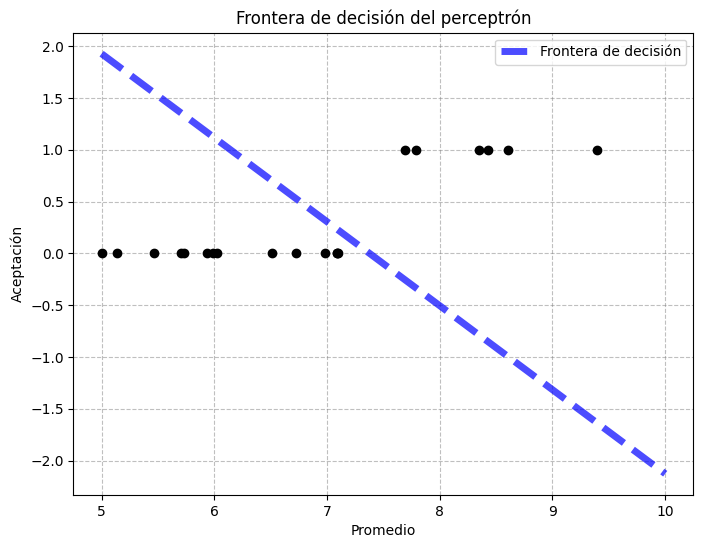

In [11]:
# Rango de valores para el eje x (promedios)
x_vals = np.linspace(5, 10)

# Cálculo de la frontera de decisión
y_vals = -(w * x_vals + b)

# Graficación
plt.figure(figsize=(8, 6))
plt.plot(promedios, aceptado, 'o', color='black')
plt.plot(x_vals, y_vals, 'b--', label="Frontera de decisión", lw=5, alpha=0.7)
plt.xlabel("Promedio")
plt.ylabel("Aceptación")
plt.grid(ls='--', color='grey', alpha=0.5)
plt.legend()
plt.title("Frontera de decisión del perceptrón")
plt.show()


# **Ejercicio 1**: Probar nuevo registro

In [43]:
# Probar con un nuevo estudiante
nuevos_promedios = [8.5, 3.6] # Pueden agregar más ejemplos

for promedio in nuevos_promedios:

    # COMPLETAR

    print(f"Promedio: {promedio:.2f} → {'Aceptado' if prediccion[0]==1 else 'No aceptado'}")

Promedio: 8.50 → Aceptado
Promedio: 3.60 → No aceptado


---
# **Perceptrón simple con múltiples entradas**

## R entradas, 1 salida
---

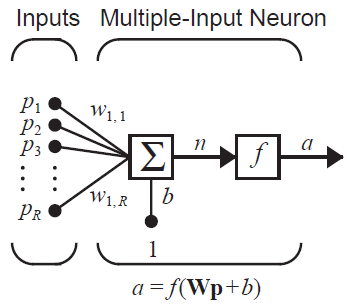

*Recuperado de*: **Hagan M, Demuth H, Beale M, De Jesús O** (2014). *Neural Network Design 2nd Ed*.

# Generar el dataset

In [12]:
# Número de registros
samples = 20

np.random.seed(10)  # semilla para reproducibilidad

# Generar promedios aleatorios
promedios = np.random.uniform(5, 10, samples)   # promedios de 5 a 10
calif_examen  = np.random.uniform(5, 10, samples)     # resultados de examen de 50 a 100

# Etiquetas
aceptado = ((promedios > 7.5) & (calif_examen > 7)).astype(int)   # regla: si promedio > 7.5 y examen > 70 → aceptado=1

for idx in range(samples):
  print(f"Promedio: {promedios[idx]:.2f}, Examen: {calif_examen[idx]:.2f} → Aceptado: {aceptado[idx]}")

Promedio: 8.86, Examen: 7.71 → Aceptado: 1
Promedio: 5.10, Examen: 5.71 → Aceptado: 0
Promedio: 8.17, Examen: 6.87 → Aceptado: 0
Promedio: 8.74, Examen: 8.37 → Aceptado: 1
Promedio: 7.49, Examen: 7.21 → Aceptado: 0
Promedio: 6.12, Examen: 7.17 → Aceptado: 0
Promedio: 5.99, Examen: 8.09 → Aceptado: 0
Promedio: 8.80, Examen: 7.57 → Aceptado: 1
Promedio: 5.85, Examen: 8.25 → Aceptado: 0
Promedio: 5.44, Examen: 8.01 → Aceptado: 0
Promedio: 8.43, Examen: 9.03 → Aceptado: 1
Promedio: 9.77, Examen: 7.61 → Aceptado: 1
Promedio: 5.02, Examen: 9.54 → Aceptado: 0
Promedio: 7.56, Examen: 6.60 → Aceptado: 0
Promedio: 9.06, Examen: 5.45 → Aceptado: 0
Promedio: 8.06, Examen: 6.50 → Aceptado: 0
Promedio: 8.61, Examen: 5.57 → Aceptado: 0
Promedio: 6.46, Examen: 9.14 → Aceptado: 0
Promedio: 9.59, Examen: 5.23 → Aceptado: 0
Promedio: 8.57, Examen: 8.13 → Aceptado: 1


# Visualizar el Dataset

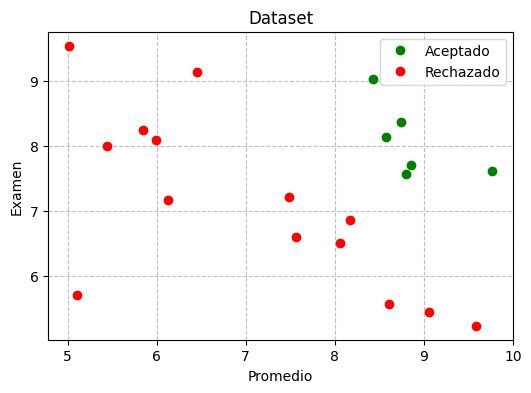

In [13]:
plt.figure(figsize=(6, 4))
plt.plot(promedios[aceptado == 1], calif_examen[aceptado == 1], 'o', color='green', label='Aceptado')
plt.plot(promedios[aceptado == 0], calif_examen[aceptado == 0], 'o', color='red', label='Rechazado')
plt.title('Dataset')
plt.xlabel('Promedio')
plt.ylabel('Examen')
plt.grid(ls='--', color='grey', alpha=0.5)
plt.legend()
plt.show()

# Inicialización de paramétros

In [14]:
# Dataset de múltiples entradas
p = np.column_stack((promedios, calif_examen))  # (n,2)
a = aceptado # (n,)

np.random.seed(10)
W = np.random.rand(2)   # vector de 2 pesos (R)
b = np.random.rand()    # sesgo escalar
epochs = 1000
lr = 0.5

print("Pesos iniciales:", W)
print("Bias inicial:", b)

Pesos iniciales: [0.77132064 0.02075195]
Bias inicial: 0.6336482349262754


### Función sumatoria

In [15]:
def SumMult(p, W, b):
    """
    Calcula n = p*W + b
    p : vector de entradas (n, d)  -> cada fila es un ejemplo
    W : vector de pesos (d,)
    b : bias escalar
    """
    return np.dot(p, W) + b # Producto punto

# Entrenamiento

In [16]:
losses, accs, weights, biases = [], [], [], []

for epoch in range(epochs):
    for i in range(len(p)):
        pi = p[i]
        ai = a[i]

        # Paso hacia adelante
        n = SumMult(pi, W, b)
        a_hat = step(n) # salida predicha

        # Cálculo del error
        error = ai - a_hat

        # Actualización de pesos
        W += lr * error * pi
        b += lr * error

    # Métricas por época
    n_all = SumMult(p, W, b)
    predictions = step(n_all)
    acc = np.mean(predictions.flatten() == a)
    loss = np.mean((predictions.flatten() - a) ** 2)

    losses.append(loss)
    accs.append(acc)
    weights.append(W.tolist())
    biases.append(b)

    print(f"Epoch {epoch+1}/{epochs} - Acc: {acc:.2f} - Loss: {loss:.2f} - W: {W} - b: {b:.2f}")

Epoch 1/1000 - Acc: 0.55 - Loss: 0.45 - W: [ 1.78214857 -1.51606413] - b: 0.13
Epoch 2/1000 - Acc: 0.55 - Loss: 0.45 - W: [ 2.79297649 -3.05288021] - b: -0.37
Epoch 3/1000 - Acc: 0.30 - Loss: 0.70 - W: [ 6.80311611 -2.44147469] - b: -0.37
Epoch 4/1000 - Acc: 0.35 - Loss: 0.65 - W: [ 7.08646609 -4.20708527] - b: -0.87
Epoch 5/1000 - Acc: 0.50 - Loss: 0.50 - W: [ 8.84836576 -6.3158432 ] - b: -1.37
Epoch 6/1000 - Acc: 0.55 - Loss: 0.45 - W: [10.61026544 -8.42460113] - b: -1.87
Epoch 7/1000 - Acc: 0.60 - Loss: 0.40 - W: [ 12.37216511 -10.53335905] - b: -2.37
Epoch 8/1000 - Acc: 0.65 - Loss: 0.35 - W: [ 12.11238304 -10.59664315] - b: -2.87
Epoch 9/1000 - Acc: 0.55 - Loss: 0.45 - W: [  9.02973781 -11.62491907] - b: -3.37
Epoch 10/1000 - Acc: 0.60 - Loss: 0.40 - W: [  7.5606314  -11.54335161] - b: -3.87
Epoch 11/1000 - Acc: 0.55 - Loss: 0.45 - W: [11.93442994 -9.28137023] - b: -3.87
Epoch 12/1000 - Acc: 0.65 - Loss: 0.35 - W: [  8.9018943  -14.00736896] - b: -4.87
Epoch 13/1000 - Acc: 0.65 - 

# Visualizar convergencias

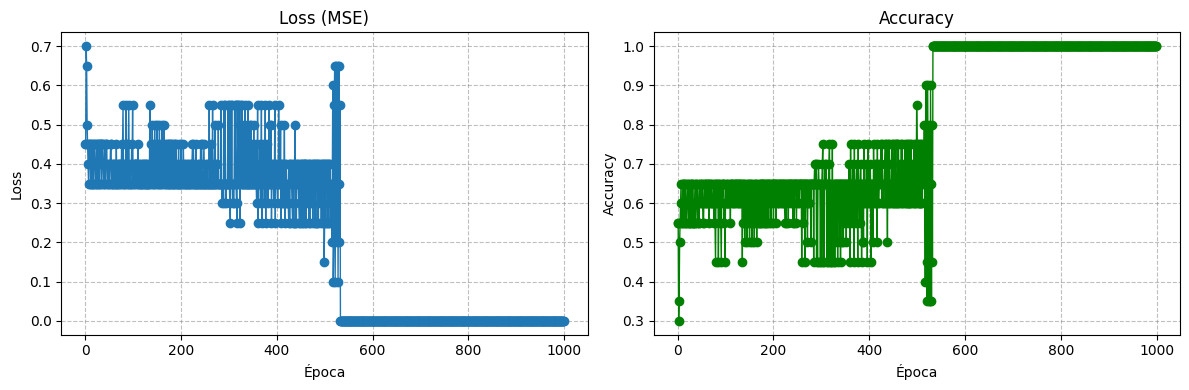

In [17]:
# Visualización
plt.figure(figsize=(12, 4))

plt.subplot(1,2,1)
plt.plot(losses, marker="o", lw=1)
plt.title("Loss (MSE)")
plt.xlabel("Época")
plt.ylabel("Loss")
plt.grid(ls='--', color='grey', alpha=0.5)

plt.subplot(1,2,2)
plt.plot(accs, marker="o", color="g", lw=1)
plt.title("Accuracy")
plt.xlabel("Época")
plt.ylabel("Accuracy")
plt.grid(ls='--', color='grey', alpha=0.5)

plt.tight_layout()
plt.show()

# **¿Factor de Parada?** 👀
---

# Ver al Perceptrón 🔎

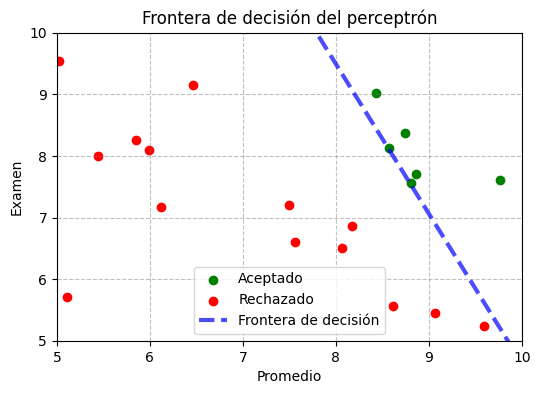

In [18]:
# Rango de valores para el eje x
x_vals = np.linspace(5, 10)

# Cálculo de la frontera de decisión
w1, w2 = W
y_vals = -(w1 * x_vals + b) / w2

# Graficación
plt.figure(figsize=(6, 4))
plt.scatter(promedios[a == 1], calif_examen[a == 1], color='green', label='Aceptado')
plt.scatter(promedios[a == 0], calif_examen[a == 0], color='red', label='Rechazado')
plt.plot(x_vals, y_vals, 'b--', label="Frontera de decisión", lw=3, alpha=0.7)
plt.xlabel("Promedio")
plt.ylabel("Examen")
plt.grid(ls='--', color='grey', alpha=0.5)
plt.legend()
plt.ylim(5, 10)
plt.xlim(5, 10)
plt.title("Frontera de decisión del perceptrón")
plt.show()


---
# **Ejercicio 2**: Agregar una nueva feature
---
>### a. Crear un arreglo de valores para las actividades extracurriculares llamado: '**extracurricular**'.
>### b. Los valores deben ser enteros en el rango: 0 - 10.
>### c. El criterio de las etiquetas es el siguiente:
>```
># aceptado = ((promedios > 7.5) & (examenes > 7) & (extracurricular >= 5)).astype(int)
>```
>### d. Inicializa los parámetros (pesos, sesgos, etc.).
>### e. Entrena el Perceptrón.
>### f. Visualiza las métricas del entrenamiento y la frontera de división.
---





In [ ]:
# Codifica tu ejercicio aquí